<a href="https://colab.research.google.com/github/aguilarmadeira/Multiobjective/blob/main/pymoo_2obj_2const_3var.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pymoo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for grapheme: filename=grapheme-0.6.0-py3-none-any.whl size=210078 sha256=9d00714a35ed8703be1005713b9c26c7c8f1098b43708f47e0457b70459e9bbb
  Stored in directory: /root/.cache/pip/wheels/01/e1/49/37e6bde9886439057450c494a79b0bef8bbe897a54aebfc757
Successfully built grapheme


**Class Development**

In [2]:
import numpy as np
from pymoo.core.problem import ElementwiseProblem

In [3]:
class MyProblem(ElementwiseProblem):
    def __init__(self):
      super().__init__(n_var = 3,
                      n_obj = 2,
                      n_ieq_constr = 2,
                      xl = np.array([-10,-10,-10]),
                      xu = np.array([10,10,10]))
    def _evaluate(self,x,out,*args,**kwargs):
      f1 = (x[0]**2+x[1]**2+x[2]**2)
      f2 = (x[0]-1)**2 + (x[1]-1)**2 + (x[2]-1)**2

      g1 = x[0] + x[1] + x[2] - 1
      g2 = -3*x[0] + x[1] + x[2] - 4

      out["F"] = [f1,f2]
      out["G"] = [g1,g2]

problem = MyProblem()

**Initializing the Algorithm**

In [4]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM

In [5]:
algorithm = NSGA2(
    pop_size = 50,
    n_offsprings = 10,
    sampling = FloatRandomSampling(),
    crossover = SBX(prob=0.9,eta=20),
    mutation = PM(eta = 25),
    eliminate_duplicates = True
)

In [6]:
from pymoo.termination import get_termination
termination = get_termination("n_gen",100)

**Optimization Process**

In [7]:
from pymoo.optimize import minimize

res = minimize(problem,
               algorithm,
               termination,
               seed = 7,
               save_history = True,
               verbose = True)

n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |       50 |      1 |  0.000000E+00 |  7.0400185790 |             - |             -
     2 |       60 |      1 |  0.000000E+00 |  3.2657714052 |  0.000000E+00 |             f
     3 |       70 |      1 |  0.000000E+00 |  1.5856599629 |  0.000000E+00 |             f
     4 |       80 |      1 |  0.000000E+00 |  0.6020188858 |  0.000000E+00 |             f
     5 |       90 |      1 |  0.000000E+00 |  0.0769202706 |  0.000000E+00 |             f
     6 |      100 |      1 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
     7 |      110 |      1 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
     8 |      120 |      1 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
     9 |      130 |      1 |  0.000000E+00 |  0.000000E+00 |  1.011372E+01 |         ideal
    10 |      140 |      1 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f

**Results and Visualization**

In [8]:
X = res.X
F = res.F

In [9]:
print(F)

[[3.51516867e-02 2.43437673e+00]
 [2.07594373e-02 2.54764779e+00]
 [8.23006535e-02 2.11889252e+00]
 [3.06145410e-02 2.51682219e+00]
 [1.00683007e-01 2.08676401e+00]
 [8.90044126e-03 2.69551304e+00]
 [1.21610814e-01 1.95374097e+00]
 [1.00578037e-01 2.08759879e+00]
 [5.86838536e-02 2.28399100e+00]
 [7.99449369e-02 2.12817832e+00]
 [1.18426072e-01 1.96854103e+00]
 [1.00598368e-01 2.08745824e+00]
 [1.52238753e-02 2.68376208e+00]
 [1.21774081e-01 1.95258499e+00]
 [1.09545740e-01 2.00540250e+00]
 [2.29839994e-03 3.01689203e+00]
 [1.21066449e-01 1.95957984e+00]
 [5.21198953e-02 2.35204324e+00]
 [1.21612196e-01 1.95373115e+00]
 [8.01068083e-02 2.12703215e+00]
 [3.51506692e-02 2.43438461e+00]
 [2.34074871e-01 1.56002463e+00]
 [6.37545740e-03 2.81677905e+00]
 [7.86649677e-02 2.13734174e+00]
 [2.23136405e-03 3.01881850e+00]
 [2.91884497e-03 3.00294974e+00]
 [1.62568275e-01 1.76745803e+00]
 [2.57906613e-03 3.00939169e+00]
 [1.31899743e-01 1.93722098e+00]
 [6.55071114e-03 2.81183303e+00]
 [1.426262

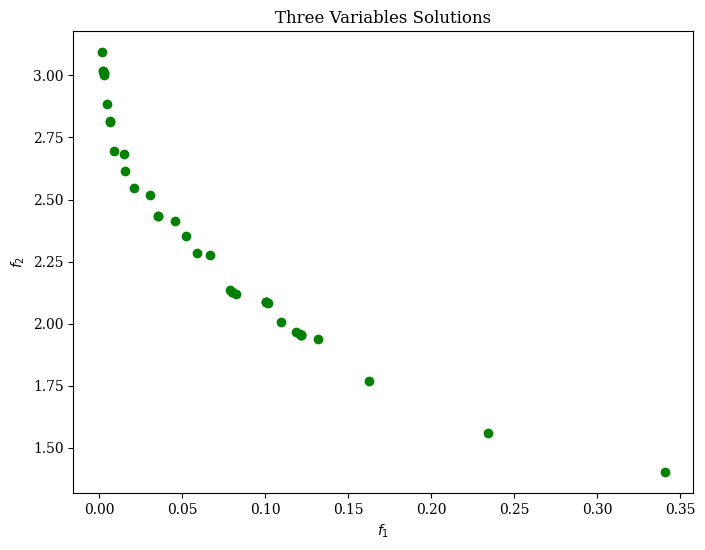

In [10]:
from pymoo.visualization.scatter import Scatter

plot = Scatter(title = "Three Variables Solutions")
plot.add(F, color = "green")
plot.show()

**Normalization**

In [12]:
ideal_point = F.min(axis=0)
nadir_point = F.max(axis=0)

In [13]:
ideal_point

array([0.00142626, 1.40170473])

In [14]:
nadir_point

array([0.34117151, 3.09267842])

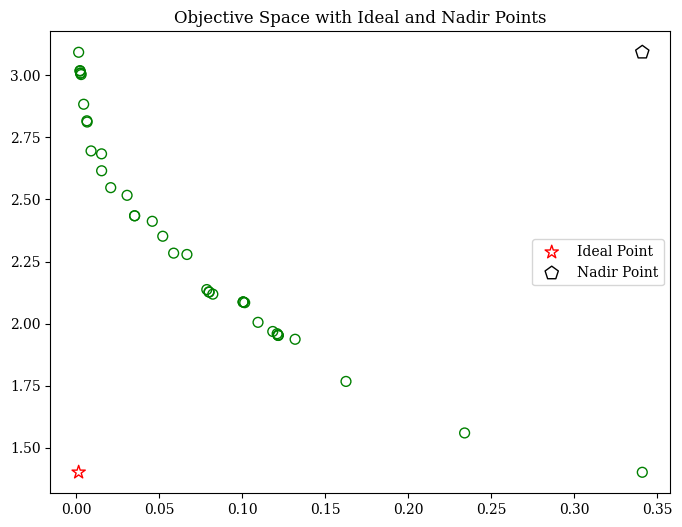

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(F[:,0],F[:,1],s=50,facecolor='none',edgecolors = 'green')
plt.scatter(ideal_point[0],ideal_point[1],facecolor='none',edgecolors = 'red',marker='*',s=100,label='Ideal Point')
plt.scatter(nadir_point[0],nadir_point[1],facecolor='none',edgecolors = 'black',marker='p',s=100,label='Nadir Point')
plt.title('Objective Space with Ideal and Nadir Points')
plt.legend()
plt.show()

In [16]:
nF = (F-ideal_point) / (nadir_point - ideal_point)

In [17]:
fl = nF.min(axis=0)
fu = nF.max(axis=0)

print(f"Scale f1: [{fl[0]},{fu[0]}]")
print(f"Scale f2: [{fl[1]},{fu[1]}]")

Scale f1: [0.0,1.0]
Scale f2: [0.0,1.0]


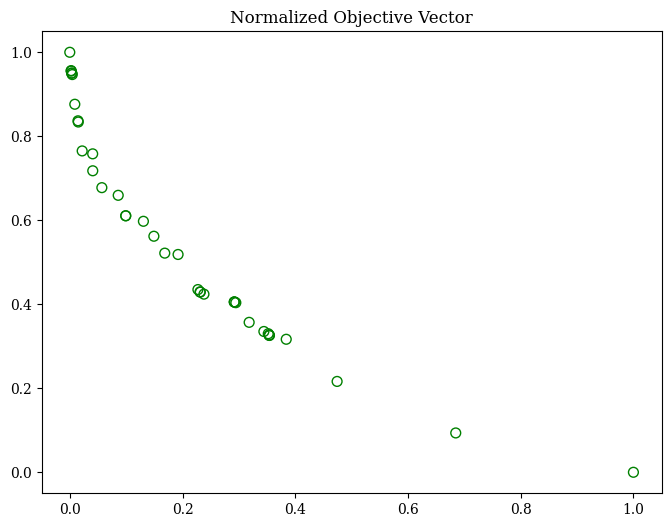

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(nF[:,0],nF[:,1],s=50,facecolor='none',edgecolors = 'green')
plt.title('Normalized Objective Vector')
plt.show()

**Compromise Programming**

In [19]:
from pymoo.decomposition.asf import ASF
decomp = ASF()

In [20]:
Weights = np.array([0.2,0.8])

In [21]:
opt_index = decomp.do(nF,1/Weights).argmin()

In [22]:
print(f"Best ASF: \n Opt_index = {opt_index} \n F = {F[opt_index]}")

Best ASF: 
 Opt_index = 21 
 F = [0.23407487 1.56002463]


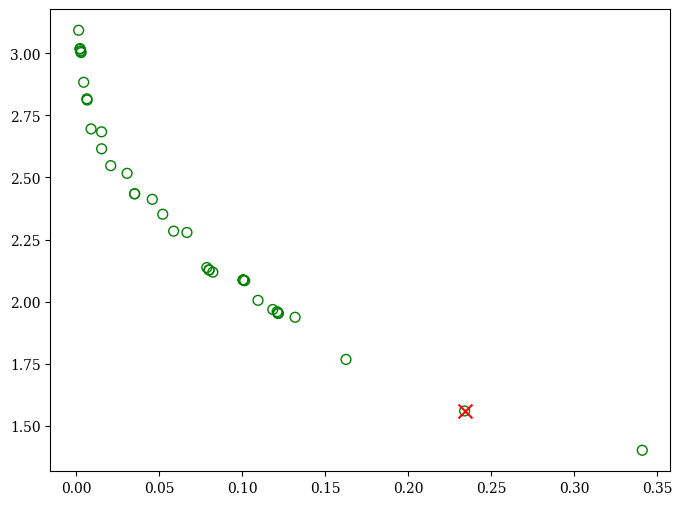

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(F[:,0],F[:,1],s=50,facecolor='none',edgecolors = 'green')
plt.scatter(F[opt_index,0],F[opt_index,1],marker = 'x',color='red',s=100)
plt.show()

In [24]:
print(X)

[[ 0.14181568  0.11441062  0.04416117]
 [ 0.07202145  0.11417775  0.05035662]
 [ 0.21715542  0.12357996  0.14096869]
 [ 0.01005064  0.11856646  0.12827907]
 [ 0.26868596  0.11193526  0.12633828]
 [ 0.07202145  0.03431563  0.05035662]
 [ 0.21715542  0.12342837  0.24335114]
 [ 0.26868596  0.11146538  0.12633828]
 [ 0.07202145  0.11417775  0.20114722]
 [ 0.21226892  0.12342357  0.14019082]
 [ 0.21715542  0.11862835  0.23915876]
 [ 0.26868596  0.11146538  0.12641872]
 [ 0.01840404  0.11856646  0.0287604 ]
 [ 0.21715542  0.12408799  0.24335114]
 [ 0.23674665  0.11417775  0.20114722]
 [-0.03245749  0.03412542 -0.00896474]
 [ 0.22535888  0.11798132  0.2374031 ]
 [ 0.17728696  0.03267414  0.14007723]
 [ 0.21715542  0.12343396  0.24335114]
 [ 0.21226892  0.12407759  0.14019082]
 [ 0.14181568  0.11440618  0.04416117]
 [ 0.27437776  0.29722479  0.26542257]
 [ 0.07202145  0.03294038 -0.01016363]
 [ 0.21226892  0.1186256   0.1397671 ]
 [-0.03245749  0.03312867 -0.00896474]
 [-0.03293146  0.04188075

In [25]:
X_Optimum = X[21,:]

In [26]:
print(X_Optimum)

[0.27437776 0.29722479 0.26542257]


**Pseudo-Weights**

In [27]:
from pymoo.mcdm.pseudo_weights import PseudoWeights

In [28]:
Weights = np.array([0.2,0.8])

In [29]:
Opt_Index2 = PseudoWeights(Weights).do(nF)

In [30]:
print(f"Best Pseudo Weights: \n Opt_Index2 = {Opt_Index2} \n F = {F[Opt_Index2]}")

Best Pseudo Weights: 
 Opt_Index2 = 21 
 F = [0.23407487 1.56002463]


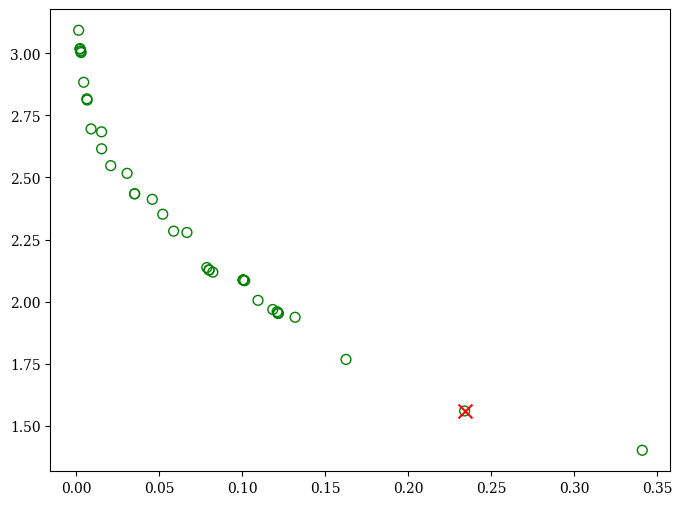

In [31]:
plt.figure(figsize=(8,6))
plt.scatter(F[:,0],F[:,1],s=50,facecolor='none',edgecolors = 'green')
plt.scatter(F[Opt_Index2,0],F[Opt_Index2,1],marker = 'x',color='red',s=100)
plt.show()